# 6.6 Sourcing & Analyzing Time-Series Data

### Content

### 1. Importing your libraries and data

### 2. Subsetting, wrangling, and cleaning time-series data

### 3. Time series analysis: decomposition

### 4. Testing for stationarity

### 5. Stationarizing

 ### Importing your libraries and data

In [1]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using last library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore") 

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

In [ ]:
## Using path method to import my dataset
"C:\Users\Peter\Desktop\Data Analytics documents\Data Immersion\Achievement 6"

In [2]:
path = r"C:\Users\Peter\Desktop\Data Analytics documents\Data Immersion\Achievement 6"

In [3]:
# imported the dataset
df = pd.read_csv(os.path.join(path, 'Project','FRED-NGDPPOT.csv'), index_col = False)

### Subsetting, wrangling, and cleaning time-series data

In [4]:
# Checking shape

df.shape

(332, 2)

In [5]:
# Checking headers

df.head()

,Date,Value
0,2031-10-01,34631.54
1,2031-07-01,34312.95
2,2031-04-01,33996.53
3,2031-01-01,33682.30
4,2030-10-01,33370.53


In [6]:
df.columns

Index(['Date', 'Value'], dtype='object')

In [7]:
# Check for missing values
df.isnull().sum()

Date     0
Value    0
dtype: int64

In [8]:
# checking for duplicate
dups = df.duplicated()

In [9]:
dups.shape # No dups

(332,)

In [10]:
# Creating a new dataframe with median Value grouped by date

data = df.groupby('Date').agg({'Value': ['median']})

In [11]:
# Checking headers

data.head()

,Value
,median
Date,
1949-01-01,274.658161
1949-04-01,275.562222
1949-07-01,277.964165
1949-10-01,281.482290
1950-01-01,284.804425


In [12]:
# Checking data types

data.dtypes

Value  median    float64
dtype: object

In [13]:
data

,Value
,median
Date,
1949-01-01,274.658161
1949-04-01,275.562222
1949-07-01,277.964165
1949-10-01,281.482290
1950-01-01,284.804425
...,...
2030-10-01,33370.530000
2031-01-01,33682.300000


In [14]:
type(data)

pandas.core.frame.DataFrame

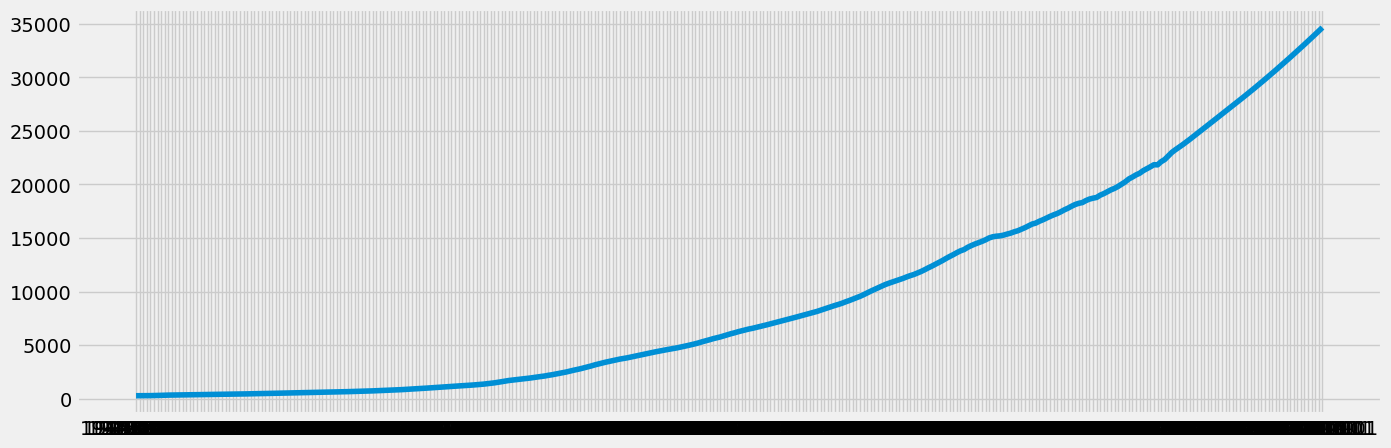

In [15]:
# Plotting the data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [16]:
# Resetting index so that the "Date" column could be used as a filter

data_2 = data.reset_index()

In [17]:
data_2.head()

,Date,Value
,,median
0,1949-01-01,274.658161
1,1949-04-01,275.562222
2,1949-07-01,277.964165
3,1949-10-01,281.482290
4,1950-01-01,284.804425


In [18]:
# performing subetting
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [19]:
data_sub.shape

(162, 2)

In [20]:
data_sub.head()

,Date,Value
,,median
124,1980-01-01,2793.831812
125,1980-04-01,2878.164874
126,1980-07-01,2958.678280
127,1980-10-01,3053.304878
128,1981-01-01,3153.478866


In [21]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
,median
datetime,
1980-01-01,2793.831812
1980-04-01,2878.164874
1980-07-01,2958.678280
1980-10-01,3053.304878
1981-01-01,3153.478866


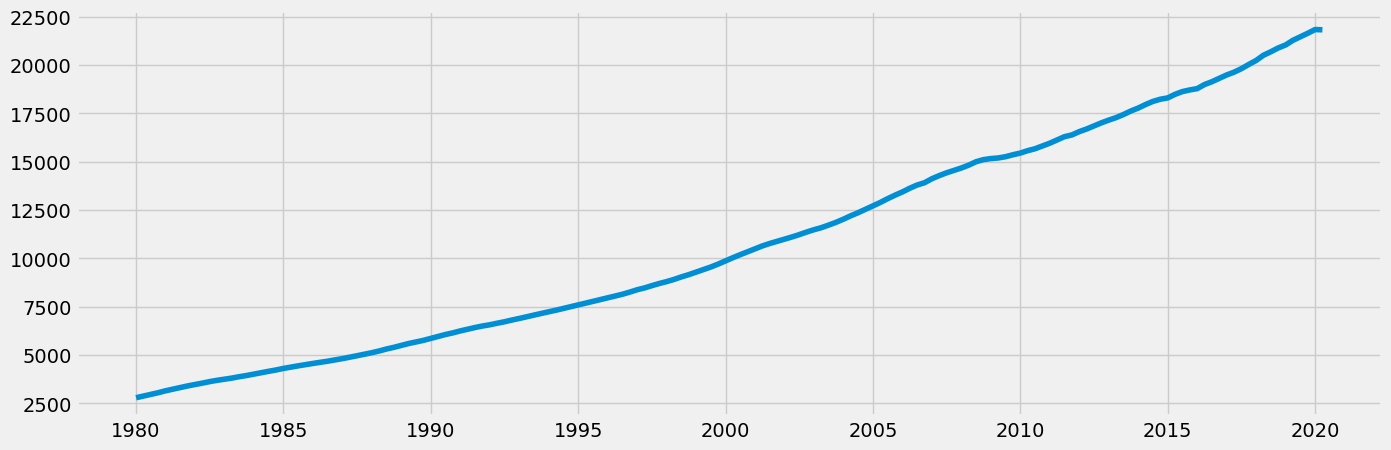

In [22]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

### Time series analysis: decomposition

In [23]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

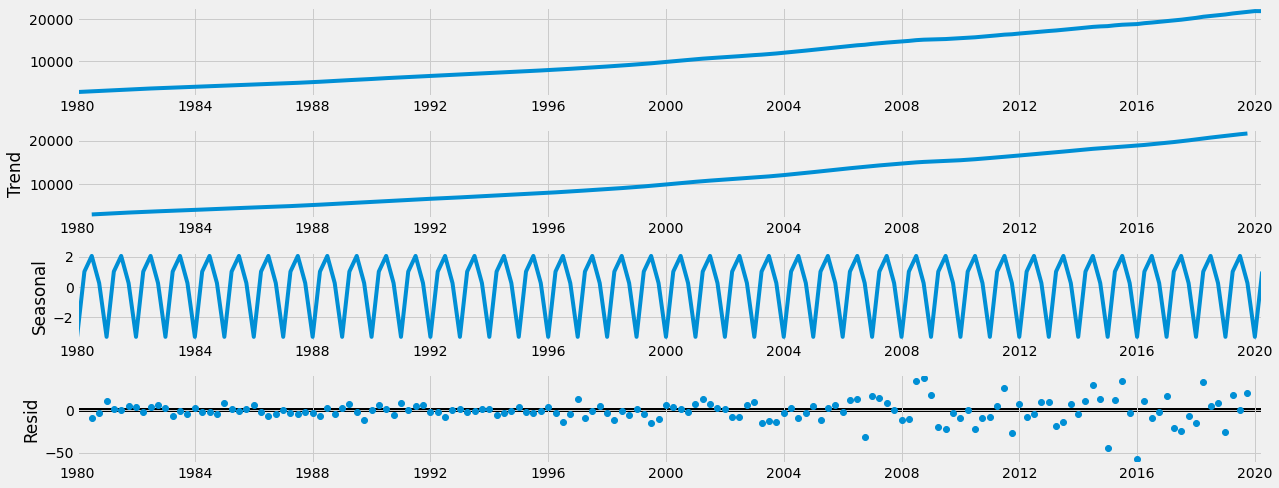

In [25]:
# Plot the separate components

decomposition.plot()
plt.show()

The decomposition here, clearly shows an upward trend of the median value. The first two charts are have the same trend due to the data does not need to be smoothed. But if they are not the same,then it means the data are unsmoothed. The trend shows upward trend from 1980 to 2020.

The third plot shows seasonality represented by a spikey curve that changes at a regular interval. 

The fourt plot is the niose, there isn’t much unexplained noise due to the data does not need to smooth

### Testing for stationarity

####  Dickey-Fuller Test

In [26]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   3.014873
p-value                          1.000000
Number of Lags Used              8.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


The test statistic here is 3.014873 is larger than the critical value (5%) of -2.880623, meaning the null hypothesis cannot be rejected. And the data is non-stationary.

#### Autocorrelation Test

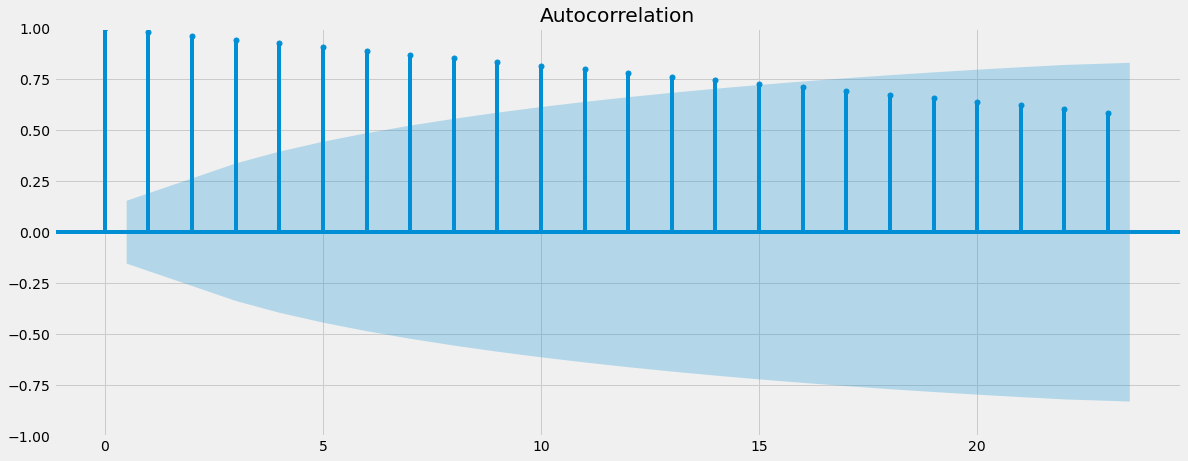

In [27]:
# Having a look at the plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

The plot above, shows that there are about 15 vertical lines that go above the blue edge of the confidence interval, indicating that the lags are significantly correlated with each other and the data is non-stationary.

### Stationarizing

#### Part 1

In [28]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [29]:
# Removing missing values as a result of differencing
data_diff.dropna(inplace = True)

In [30]:
# looking at the head
data_diff.head()

,Value
,median
datetime,
1980-04-01,84.333062
1980-07-01,80.513406
1980-10-01,94.626598
1981-01-01,100.173988
1981-04-01,84.091205


In [31]:
data_diff.columns

MultiIndex([('Value', 'median')],
           )

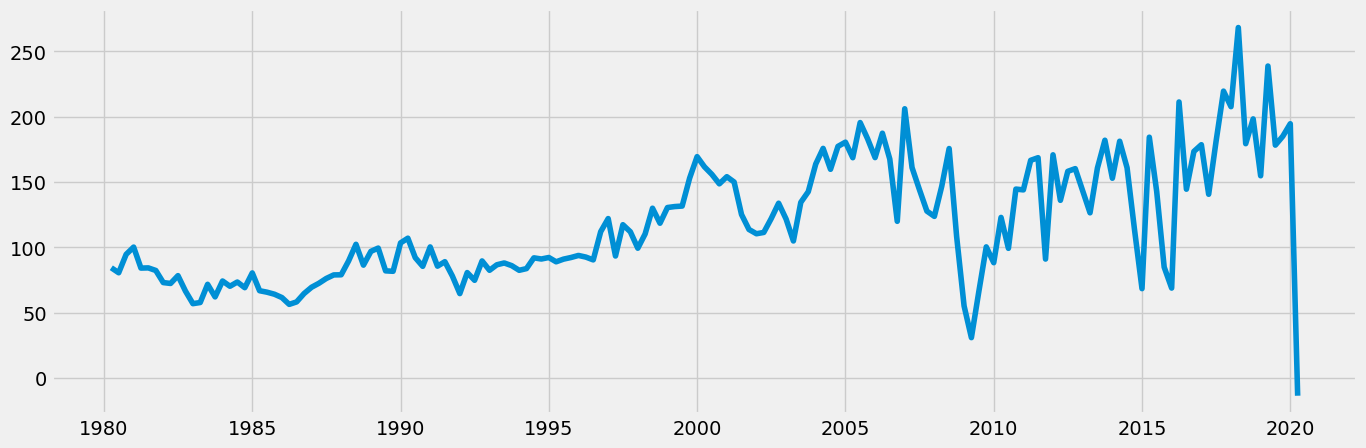

In [32]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [33]:
# Re-running the Dickey-Fuller Test to check for stationarity again
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.713332
p-value                          0.424257
Number of Lags Used             11.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


The results show that the data is still not stationary. The test statistic value (-1.713332) is higher than the critical value (5%) of -2.881141 and the p-value is higher than 0.05. Meaning the null hypothesis cannot be rejected. And the data is non-stationary.

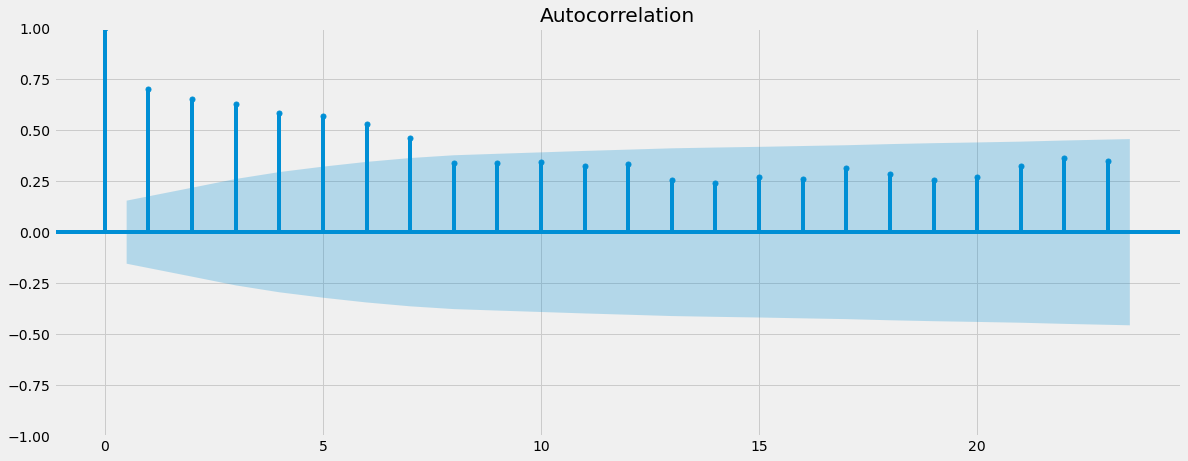

In [34]:
# Plotting the autocorrelation again
plot_acf(data_diff)
plt.show()

The plot above, shows that only 7 vertical lines that go above the blue edge of the confidence interval, indicating that the lags are significantly correlated with each other and the data is non-stationary.

#### Part 2

In [35]:
data_diff_2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [36]:
# Removing missing values as a result of differencing
data_diff_2.dropna(inplace = True)

In [37]:
# looking at the head
data_diff_2.head()

,Value
,median
datetime,
1980-07-01,-3.819656
1980-10-01,14.113192
1981-01-01,5.547390
1981-04-01,-16.082783
1981-07-01,0.141639


In [38]:
data_diff_2.columns

MultiIndex([('Value', 'median')],
           )

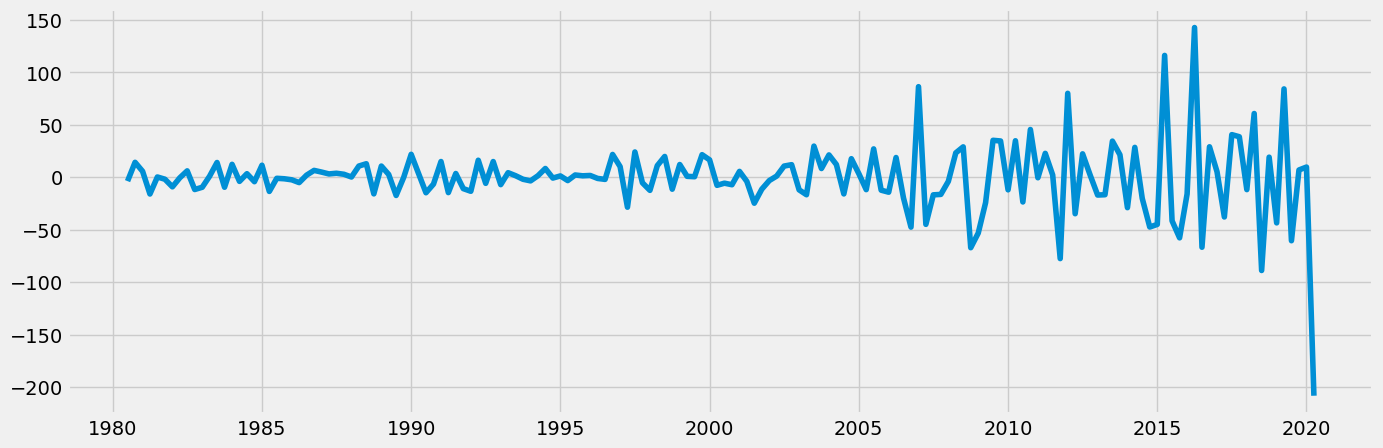

In [39]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [40]:
# Re-running the Dickey-Fuller Test to check for stationarity again
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -5.198135
p-value                          0.000009
Number of Lags Used             10.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


The results show that the data is now stationary. The test statistic value (-5.198135) is less than the critical value (5%) of -2.881141 and the p-value is lower than 0.05. Meaning the null hypothesis can be rejected. And the data is stationary.

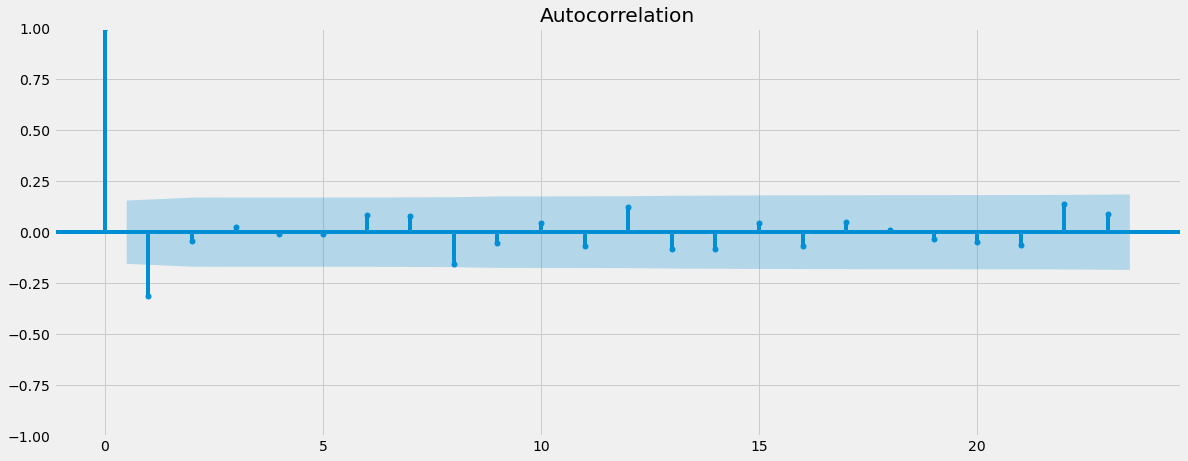

In [41]:
# Plotting the autocorrelation again
plot_acf(data_diff_2)
plt.show()

The plot above, shows that only 1 vertical lines that go above the blue edge of the confidence interval, indicating that the lags are significantly correlated with each other and the data is stationary.